## Importamos librerias y abrimos dataset

In [1]:
#Manipulacion de datos y funciones matemáticas
import pandas as pd
import numpy as np

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt
import dtreeviz

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer


#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

#Metricas para evaluar modelos
from sklearn import metrics

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV
from collections import defaultdict

from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

from sklearn.ensemble import VotingClassifier  
from sklearn.metrics import roc_auc_score

#Redes neuronales
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, StandardScaler

np.random.seed(1)
tf.random.set_seed(1)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

data = pd.read_csv('./Datasets/dataset_modificado.csv')
data_test = pd.read_csv('./Datasets/data_test.csv')

2023-11-25 16:33:38.089665: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 16:33:38.647486: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-25 16:33:38.647511: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-25 16:33:38.650618: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-25 16:33:38.944688: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 16:33:38.947554: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

## Creamos los datos para hacer tests

In [2]:
ds_trabajo_x = data.drop(['is_canceled','id'], axis='columns', inplace=False)
ds_trabajo_y = data['is_canceled'].copy()

x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x,
                                                    ds_trabajo_y,
                                                    test_size=0.3, 
                                                    random_state=30)

# Arbol de decision

Observamos precisión

In [3]:
tree_model = tree.DecisionTreeClassifier(criterion="entropy",
                                         max_depth = 15,
                                         max_features=None,
                                         min_samples_split=14,
                                         min_samples_leaf=2,
                                         random_state=45)
model = tree_model.fit(X = x_train, y = y_train)

tree_predictions = model.predict(x_test)
ds_resultados=pd.DataFrame(zip(y_test,tree_predictions),columns=['test','pred'])

#Observamos accuracy del modelo
accuracy = accuracy_score(y_test, tree_predictions)
print("Accuracy:", accuracy)

#Observamos la precision del modelo
precision = precision_score(y_test, tree_predictions)
print("Precisión:", precision)

#Observamos el recall del modelo
recall = recall_score(y_test, tree_predictions)
print("Recall:", recall)

#Observamos el F1 Score de este arbol
f1 = f1_score(y_test, tree_predictions)
print("F1-Score:", f1)

Accuracy: 0.8515406162464986
Precisión: 0.8381571175428234
Recall: 0.8691657478868063
F1-Score: 0.8533798412316574


Buscamos la mejor precisión del arbol con cross validation

In [4]:
#Cantidad de combinaciones que quiero probar
n=10

params_grid = {'criterion': ['gini', 'entropy'],
    'max_depth': list(range(15,30)),
    'min_samples_split': list(range(10,25)),
    'min_samples_leaf': list(range(1,5)),
    'max_features': [None, "sqrt", "log2"]}

folds=10
kfoldcv = StratifiedKFold(n_splits=folds)
base_tree = tree.DecisionTreeClassifier()
scorer_fn = make_scorer(f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)

randomcv.fit(x_train,y_train)

#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

' #Cantidad de combinaciones que quiero probar\nn=10\n\nparams_grid = {\'criterion\': [\'gini\', \'entropy\'],\n    \'max_depth\': list(range(15,30)),\n    \'min_samples_split\': list(range(10,25)),\n    \'min_samples_leaf\': list(range(1,5)),\n    \'max_features\': [None, "sqrt", "log2"]}\n\nfolds=10\nkfoldcv = StratifiedKFold(n_splits=folds)\nbase_tree = tree.DecisionTreeClassifier()\nscorer_fn = make_scorer(f1_score)\n\n#Random Search Cross Validation\nrandomcv = RandomizedSearchCV(estimator=base_tree,\n                              param_distributions = params_grid,\n                              scoring=scorer_fn,\n                              cv=kfoldcv,\n                              n_iter=n)\n\nrandomcv.fit(x_train,y_train)\n\n#Mejores hiperparametros del arbol\nprint(randomcv.best_params_)\n#Mejor métrica\nprint(randomcv.best_score_) '

Probamos con los nuevos parametros

In [5]:
tree_model = tree.DecisionTreeClassifier(criterion="entropy",
                                         max_depth = 15,
                                         max_features=None,
                                         min_samples_split=12,
                                         min_samples_leaf=2,
                                         random_state=42)
model = tree_model.fit(X = x_train, y = y_train)

y_pred = model.predict(x_test)
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])

#Observamos accuracy del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Observamos la precision del modelo
precision = precision_score(y_test, y_pred)
print("Precisión:", precision)

#Observamos el recall del modelo
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

#Observamos el F1 Score de este arbol
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.8506881013274875
Precisión: 0.8364557558619065
Recall: 0.8696557638123239
F1-Score: 0.8527327327327328


Graficamos su matriz de confusion

Text(50.722222222222214, 0.5, 'True')

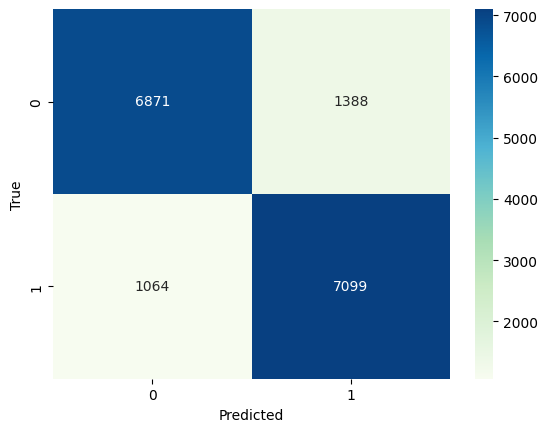

In [6]:
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Creamos CSV con el mejor arbol de decision

In [7]:
tree_model = tree.DecisionTreeClassifier(criterion="entropy",
                                         max_depth = 15,
                                         max_features=None,
                                         min_samples_split=12,
                                         min_samples_leaf=4,
                                         random_state=42)
tree_model.fit(ds_trabajo_x, ds_trabajo_y)
y_pred = tree_model.predict(data_test.drop('id', axis = 1))

resultado = pd.DataFrame()
resultado['id'] = data_test['id']
resultado['is_canceled'] = y_pred
#Comento esta linea para que no crear el archivo siempre
#resultado.to_csv('predicciones_arbol_decision_2.csv', index=False)

# KNN

In [8]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

knn_predictions = knn_model.predict(np.array(x_test))
ds_resultados=pd.DataFrame(zip(y_test,knn_predictions),columns=['test','pred'])

#Observamos accuracy del modelo
accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy:", accuracy)

#Observamos la precision del modelo
precision = precision_score(y_test, knn_predictions)
print("Precisión:", precision)

#Observamos el recall del modelo
recall = recall_score(y_test, knn_predictions)
print("Recall:", recall)

#Observamos el F1 Score de este arbol
f1 = f1_score(y_test, knn_predictions)
print("F1-Score:", f1)

Accuracy: 0.7389477530142492
Precisión: 0.7355371900826446
Recall: 0.7413940953080975
F1-Score: 0.738454029650418


Buscamos mejores hiperparametros 

In [9]:
n = 5

params_grid = {
    'n_neighbors': list(range(1, 21)),  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Pesos de los vecinos
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritmo de búsqueda
    'p': [1, 2]  # Parámetro de distancia (1 para Manhattan, 2 para Euclidiana)
}

folds = 10
kfoldcv = StratifiedKFold(n_splits=folds)
base_knn = KNeighborsClassifier()
scorer_fn = make_scorer(f1_score)

randomcv = RandomizedSearchCV(
    estimator=base_knn,
    param_distributions=params_grid,
    scoring=scorer_fn,
    cv=kfoldcv,
    n_iter=n
)

randomcv.fit(x_train, y_train)

#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

" n = 5\n\nparams_grid = {\n    'n_neighbors': list(range(1, 21)),  # Número de vecinos\n    'weights': ['uniform', 'distance'],  # Pesos de los vecinos\n    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritmo de búsqueda\n    'p': [1, 2]  # Parámetro de distancia (1 para Manhattan, 2 para Euclidiana)\n}\n\nfolds = 10\nkfoldcv = StratifiedKFold(n_splits=folds)\nbase_knn = KNeighborsClassifier()\nscorer_fn = make_scorer(f1_score)\n\nrandomcv = RandomizedSearchCV(\n    estimator=base_knn,\n    param_distributions=params_grid,\n    scoring=scorer_fn,\n    cv=kfoldcv,\n    n_iter=n\n)\n\nrandomcv.fit(x_train, y_train)\n\n#Mejores hiperparametros del arbol\nprint(randomcv.best_params_)\n#Mejor métrica\nprint(randomcv.best_score_) "

KNN con "mejores" hiperparametros encontrados

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=17,
                                 weights='distance',
                                 algorithm='ball_tree',
                                 p=1)
knn_model.fit(x_train, y_train)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=17, p=1,
                     weights='distance')

In [11]:
knn_predictions = knn_model.predict(np.array(x_test))
ds_resultados=pd.DataFrame(zip(y_test,knn_predictions),columns=['test','pred'])

#Observamos accuracy del modelo
accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy:", accuracy)

#Observamos la precision del modelo
precision = precision_score(y_test, knn_predictions)
print("Precisión:", precision)

#Observamos el recall del modelo
recall = recall_score(y_test, knn_predictions)
print("Recall:", recall)

#Observamos el F1 Score de este arbol
f1 = f1_score(y_test, knn_predictions)
print("F1-Score:", f1)

Accuracy: 0.7910729509194983
Precisión: 0.7750523134154848
Recall: 0.8167340438564253
F1-Score: 0.795347450044736


Text(50.722222222222214, 0.5, 'True')

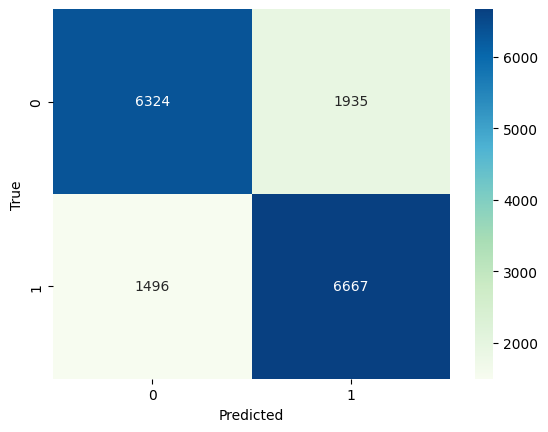

In [12]:
tabla=confusion_matrix(y_test, knn_predictions)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [3]:
knn_model = KNeighborsClassifier(n_neighbors=17,
                                 weights='distance',
                                 algorithm='ball_tree',
                                 p=1)
knn_model.fit(ds_trabajo_x, ds_trabajo_y)
y_pred = knn_model.predict(data_test.drop('id', axis = 1))

resultado = pd.DataFrame()
resultado['id'] = data_test['id']
resultado['is_canceled'] = y_pred
#Comento esta linea para que no crear el archivo siempre
#resultado.to_csv('predicciones.csv', index=False)

# Support Vector Machine

In [3]:
svm_classifier = SVC(kernel='linear',
                    C=0.1,
                    gamma='scale',
                    degree=3,
                    class_weight=None)

svm_classifier.fit(x_train, y_train)

svm_predictions = svm_classifier.predict(np.array(x_test))
ds_resultados=pd.DataFrame(zip(y_test,svm_predictions),columns=['test','pred'])

#Observamos accuracy del modelo
accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy:", accuracy)

#Observamos la precision del modelo
precision = precision_score(y_test, svm_predictions)
print("Precisión:", precision)

#Observamos el recall del modelo
recall = recall_score(y_test, svm_predictions)
print("Recall:", recall)

#Observamos el F1 Score de este arbol
f1 = f1_score(y_test, svm_predictions)
print("F1-Score:", f1)

Accuracy: 0.7983802216538789
Precisión: 0.8232102686251158
Recall: 0.759028794533919
F1-Score: 0.7898178124801626


#### Busqueda exhaustiva de hiperparametros

In [14]:
param_grid = {
    'C': [0.1, 1, 10, 15, 20],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale', 'auto'],
    'degree': [2, 3, 4],
    'coef0': [0, 1],
    'class_weight': [None, 'balanced']
}

# Crear el clasificador SVM
svm_classifier = SVC()

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Mostrar el mejor puntaje
print("Mejor puntaje de validación cruzada:", grid_search.best_score_)

' param_grid = {\n    \'C\': [0.1, 1, 10],\n    \'kernel\': [\'linear\', \'rbf\', \'poly\'],\n    \'gamma\': [0.1, 1, \'scale\', \'auto\'],\n    \'degree\': [2, 3, 4],\n    \'coef0\': [0, 1],\n    \'class_weight\': [None, \'balanced\']\n}\n\n# Crear el clasificador SVM\nsvm_classifier = SVC()\n\n# Realizar la búsqueda en cuadrícula con validación cruzada\ngrid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring=\'accuracy\')\ngrid_search.fit(x_train, y_train)\n\n# Mostrar los mejores hiperparámetros\nprint("Mejores hiperparámetros encontrados:")\nprint(grid_search.best_params_)\n\n# Mostrar el mejor puntaje\nprint("Mejor puntaje de validación cruzada:", grid_search.best_score_) '

Creamos SVM con "mejores" hiperparametros encontrados

In [18]:
svm_classifier = SVC(kernel='linear',
                    C=10,
                    gamma="auto",
                    degree=2,
                    coef0=0,
                    class_weight= None
                    )


svm_classifier.fit(x_train, y_train)

SVC(C=10, coef0=0, degree=2, gamma='auto', kernel='linear')

In [19]:
svm_predictions = svm_classifier.predict(np.array(x_test))
ds_resultados=pd.DataFrame(zip(y_test,svm_predictions),columns=['test','pred'])

#Observamos accuracy del modelo
accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy:", accuracy)

#Observamos la precision del modelo
precision = precision_score(y_test, svm_predictions)
print("Precisión:", precision)

#Observamos el recall del modelo
recall = recall_score(y_test, svm_predictions)
print("Recall:", recall)

#Observamos el F1 Score de este arbol
f1 = f1_score(y_test, svm_predictions)
print("F1-Score:", f1)

Accuracy: 0.7964316161247108
Precisión: 0.8029716568860032
Recall: 0.7846510492923378
F1-Score: 0.7937056464054304


Text(50.722222222222214, 0.5, 'True')

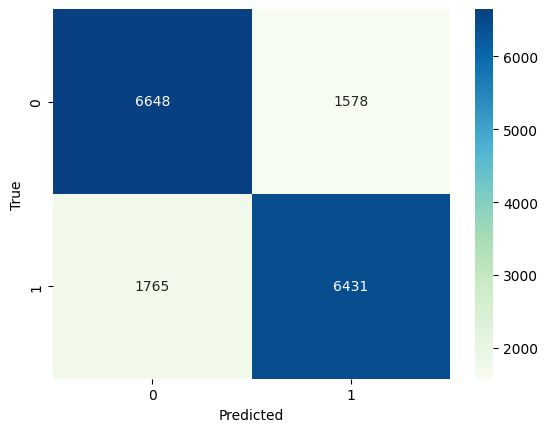

In [20]:
tabla=confusion_matrix(y_test, svm_predictions)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [4]:
svm_classifier = SVC(kernel='linear',
                    C=10,
                    gamma="auto",
                    degree=2,
                    coef0=0,
                    class_weight= None
                    )
svm_classifier.fit(ds_trabajo_x, ds_trabajo_y)
y_pred = svm_classifier.predict(data_test.drop('id', axis = 1))

resultado = pd.DataFrame()
resultado['id'] = data_test['id']
resultado['is_canceled'] = y_pred
#Comento esta linea para que no crear el archivo siempre
#resultado.to_csv('predicciones.csv', index=False)

# Random Forest

In [115]:
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x,
                                                    ds_trabajo_y,
                                                    test_size=0.3,  
                                                    random_state=70)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [116]:
rf_predictions = rf_model.predict(x_test)
ds_resultados=pd.DataFrame(zip(y_test, rf_predictions),columns=['test','pred'])

#Observamos accuracy del modelo
accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy:", accuracy)

#Observamos la precision del modelo
precision = precision_score(y_test, rf_predictions)
print("Precisión:", precision)

#Observamos el recall del modelo
recall = recall_score(y_test, rf_predictions)
print("Recall:", recall)

#Observamos el F1 Score de este arbol
f1 = f1_score(y_test, rf_predictions)
print("F1-Score:", f1)

Accuracy: 0.8816222141030325
Precisión: 0.8916842235716942
Recall: 0.8705384150030248
F1-Score: 0.8809844496143014


In [51]:
param_grid = {
    'n_estimators':[550,551,555],
    'bootstrap':[True], 
    'max_depth':[20,25,28],
    'max_features':[20,22,25], 
    'min_samples_split':[2,3,4], 
    'min_samples_leaf':[1,2,3], 
    'random_state':[65,71,75]
}

# Crear el clasificador SVM
svm_classifier = RandomForestClassifier()

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Mostrar el mejor puntaje
print("Mejor puntaje de validación cruzada:", grid_search.best_score_)

'param_grid = {\n    \'n_estimators\':[550,551,555],\n    \'bootstrap\':[True], \n    \'max_depth\':[20,25,28],\n    \'max_features\':[20,22,25], \n    \'min_samples_split\':[2,3,4], \n    \'min_samples_leaf\':[1,2,3], \n    \'random_state\':[65,71,75]\n}\n\n# Crear el clasificador SVM\nsvm_classifier = RandomForestClassifier()\n\n# Realizar la búsqueda en cuadrícula con validación cruzada\ngrid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring=\'accuracy\')\ngrid_search.fit(x_train, y_train)\n\n# Mostrar los mejores hiperparámetros\nprint("Mejores hiperparámetros encontrados:")\nprint(grid_search.best_params_)\n\n# Mostrar el mejor puntaje\nprint("Mejor puntaje de validación cruzada:", grid_search.best_score_)'

In [126]:
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x,
                                                    ds_trabajo_y,
                                                    test_size=0.3,  
                                                    random_state=70)
rf_model = RandomForestClassifier(n_estimators=551,
                                  bootstrap=True, 
                                  max_depth=28,
                                  max_features=22, 
                                  min_samples_split=2, 
                                  min_samples_leaf=1, 
                                  random_state=71)
rf_model.fit(x_train, y_train)


RandomForestClassifier(max_depth=28, max_features=22, n_estimators=551,
                       random_state=71)

In [118]:
rf_predictions = rf_model.predict(x_test)
ds_resultados=pd.DataFrame(zip(y_test, rf_predictions),columns=['test','pred'])

#Observamos accuracy del modelo
accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy:", accuracy)

#Observamos la precision del modelo
precision = precision_score(y_test, rf_predictions)
print("Precisión:", precision)

#Observamos el recall del modelo
recall = recall_score(y_test, rf_predictions)
print("Recall:", recall)

#Observamos el F1 Score de este arbol
f1 = f1_score(y_test, rf_predictions)
print("F1-Score:", f1)

Accuracy: 0.8867981975398855
Precisión: 0.8905145086564252
Recall: 0.8837265577737448
F1-Score: 0.8871075484301938


In [20]:
sorted(list(zip(ds_trabajo_x.columns.to_list(), rf_model.feature_importances_)), key=lambda x: -x[1])

[('lead_time', 0.14973164827156343),
 ('deposit_type_Non Refund', 0.14122100593622594),
 ('adr', 0.0717401437607894),
 ('agent', 0.05688026944623761),
 ('arrival_date_day_of_month', 0.053254685803881305),
 ('most_canceled_country', 0.051045667053642406),
 ('total_of_special_requests', 0.04758865835557346),
 ('arrival_date_week_number', 0.04682470222905106),
 ('market_segment_Online TA', 0.043876423513557646),
 ('less_canceled_country', 0.04230875429088791),
 ('change_room', 0.04165462282932192),
 ('nights', 0.03371446648174037),
 ('required_car_parking_spaces', 0.029318248364962246),
 ('arrival_date_year', 0.025338103456781034),
 ('customer_type_Transient', 0.018807575473224234),
 ('previous_cancellations', 0.01822081313098301),
 ('booking_changes', 0.016327401326600117),
 ('customer_type_Transient-Party', 0.009930294531678362),
 ('market_segment_Offline TA/TO', 0.008665705503112627),
 ('adults', 0.008020127131311025),
 ('hotel_Resort Hotel', 0.00701600446022331),
 ('distribution_chann

Graficamos su matriz de confusion

Text(50.722222222222214, 0.5, 'True')

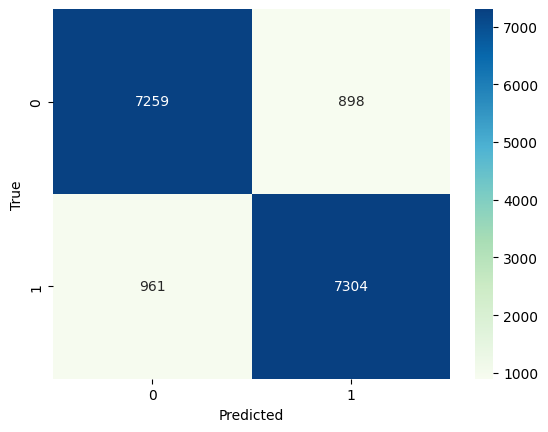

In [21]:
tabla=confusion_matrix(y_test, rf_predictions)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Creamos CSV con el modelo RF

In [22]:
rf_model = RandomForestClassifier(n_estimators=551,
                                  bootstrap=True, 
                                  max_depth=28,
                                  max_features=22, 
                                  min_samples_split=2, 
                                  min_samples_leaf=1, 
                                  random_state=71)
rf_model.fit(ds_trabajo_x, ds_trabajo_y)
y_pred = rf_model.predict(data_test.drop('id', axis = 1))

resultado = pd.DataFrame()
resultado['id'] = data_test['id']
resultado['is_canceled'] = y_pred
#Comento esta linea para que no crear el archivo siempre
resultado.to_csv('predicciones.csv', index=False)

" rf_model = RandomForestClassifier(n_estimators=551,\n                                  bootstrap=True, \n                                  max_depth=28,\n                                  max_features=22, \n                                  min_samples_split=2, \n                                  min_samples_leaf=1, \n                                  random_state=71)\nrf_model.fit(ds_trabajo_x, ds_trabajo_y)\ny_pred = rf_model.predict(data_test.drop('id', axis = 1))\n\nresultado = pd.DataFrame()\nresultado['id'] = data_test['id']\nresultado['is_canceled'] = y_pred\n#Comento esta linea para que no crear el archivo siempre\nresultado.to_csv('predicciones.csv', index=False) "

# XGBoost

In [59]:
xgb_model = XGBClassifier(n_estimators=100)

xgb_model.fit(x_train, y_train)

xgb_predictions = xgb_model.predict(np.array(x_test))
ds_resultados=pd.DataFrame(zip(y_test, xgb_predictions),columns=['test','pred'])

#Observamos accuracy del modelo
accuracy = accuracy_score(y_test, xgb_predictions)
print("Accuracy:", accuracy)

#Observamos la precision del modelo
precision = precision_score(y_test, xgb_predictions)
print("Precisión:", precision)

#Observamos el recall del modelo
recall = recall_score(y_test, xgb_predictions)
print("Recall:", recall)

#Observamos el F1 Score de este arbol
f1 = f1_score(y_test, xgb_predictions)
print("F1-Score:", f1)

Accuracy: 0.870965777615394
Precisión: 0.8667471333735667
Recall: 0.8761591020009761
F1-Score: 0.8714277046295734


Random search para busqueda de hiperparametros

In [24]:
n=10

params_grid = {'n_estimators':[300, 500, 700, 1000],
                'max_depth':list(range(0,30)),
                'learning_rate':[1, 0.1, 0.01],
                'subsample':1,
                'colsample_bytree':[1, 0.8, 0.5],
                'gamma':[0.8, 0.5, 0.3],
                'objective':"reg:logistic",
                'random_state':30}

folds=10
kfoldcv = StratifiedKFold(n_splits=folds)
base_tree = XGBClassifier()
scorer_fn = make_scorer(f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)

randomcv.fit(x_train,y_train)

#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

' #Cantidad de combinaciones que quiero probar\nn=10\n\nparams_grid = {\'n_estimators\':[300, 500, 700, 1000],\n                \'max_depth\':list(range(0,30)),\n                \'learning_rate\':[1, 0.1, 0.01],\n                \'subsample\':1,\n                \'colsample_bytree\':[1, 0.8, 0.5],\n                \'gamma\':[0.8, 0.5, 0.3],\n                \'objective\':"reg:logistic",\n                \'random_state\':30}\n\nfolds=10\nkfoldcv = StratifiedKFold(n_splits=folds)\nbase_tree = XGBClassifier()\nscorer_fn = make_scorer(f1_score)\n\n#Random Search Cross Validation\nrandomcv = RandomizedSearchCV(estimator=base_tree,\n                              param_distributions = params_grid,\n                              scoring=scorer_fn,\n                              cv=kfoldcv,\n                              n_iter=n)\n\nrandomcv.fit(x_train,y_train)\n\n#Mejores hiperparametros del arbol\nprint(randomcv.best_params_)\n#Mejor métrica\nprint(randomcv.best_score_) '

XGB con "mejores" hiperparametros encontrados

In [127]:
xgb_model = XGBClassifier(n_estimators=1000,
                          max_depth=25,
                          learning_rate=0.01,
                          subsample=1,
                          colsample_bytree=0.8,
                          gamma=0.3,
                          objective="reg:logistic",
                          random_state=30)

xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='reg:logistic', ...)

In [67]:
xgb_predictions = xgb_model.predict(np.array(x_test))
ds_resultados=pd.DataFrame(zip(y_test, xgb_predictions),columns=['test','pred'])

#Observamos accuracy del modelo
accuracy = accuracy_score(y_test, xgb_predictions)
print("Accuracy:", accuracy)

#Observamos la precision del modelo
precision = precision_score(y_test, xgb_predictions)
print("Precisión:", precision)

#Observamos el recall del modelo
recall = recall_score(y_test, xgb_predictions)
print("Recall:", recall)

#Observamos el F1 Score de este arbol
f1 = f1_score(y_test, xgb_predictions)
print("F1-Score:", f1)

Accuracy: 0.8818657897941785
Precisión: 0.8852478986478256
Recall: 0.8792498487598306
F1-Score: 0.8822386791307515


Text(50.722222222222214, 0.5, 'True')

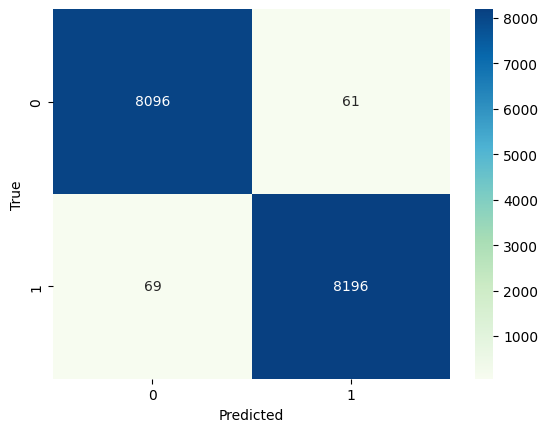

In [27]:
tabla=confusion_matrix(y_test, xgb_predictions)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [28]:
data_dmatrix = xgb.DMatrix(data=x_train, label=y_train)

#Entreno CV para probar el learning rate
results=xgb.cv(dtrain=data_dmatrix,nfold=5,params={'learning_rate':0.1},num_boost_round=8,metrics='auc')
results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.886220,0.002083,0.884627,0.003583
1,0.894414,0.001062,0.892783,0.004256
2,0.894946,0.001849,0.892674,0.004202
3,0.896220,0.001808,0.894229,0.003629
4,0.898224,0.001748,0.896352,0.003922
5,0.902844,0.002976,0.900946,0.005526
6,0.908134,0.002087,0.906127,0.003834
7,0.912693,0.001709,0.910626,0.003564


Realizamos cross validation

In [29]:
scores = cross_val_score(xgb_model, x_train, y_train, cv=10, scoring='accuracy')

print("Accuracy por cada fold de validación cruzada:")
print(scores)

Accuracy por cada fold de validación cruzada:
[0.89196242 0.8763048  0.87447808 0.87056367 0.87787056 0.87679457
 0.87757766 0.88227617 0.89141216 0.87653354]


In [68]:
xgb_model = XGBClassifier(n_estimators=1000,
                          max_depth=25,
                          learning_rate=0.01,
                          subsample=1,
                          colsample_bytree=0.8,
                          gamma=0.3,
                          objective="reg:logistic",
                          random_state=30)
xgb_model.fit(ds_trabajo_x, ds_trabajo_y)

y_pred = xgb_model.predict(data_test.drop('id', axis = 1))

resultado = pd.DataFrame()
resultado['id'] = data_test['id']
resultado['is_canceled'] = y_pred
#Comento esta linea para que no crear el archivo siempre
resultado.to_csv('predicciones.csv', index=False)

# Realizamos ensambles

## Ensamble tipo voting

In [5]:
rf_model = RandomForestClassifier(n_estimators=551,
                                  bootstrap=True, 
                                  max_depth=28,
                                  max_features=22, 
                                  min_samples_split=2, 
                                  min_samples_leaf=1, 
                                  random_state=71)

xgb_model = XGBClassifier(n_estimators=1000,
                          max_depth=25,
                          learning_rate=0.01,
                          subsample=1,
                          colsample_bytree=0.8,
                          gamma=0.3,
                          objective="reg:logistic",
                          random_state=30)

svm_classifier = SVC(kernel='linear',
                    C=0.1,
                    gamma='scale',
                    degree=3,
                    class_weight=None)


In [6]:
ensemble_model = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model), ('svm', svm_classifier)], voting='hard')   

ensemble_model.fit(x_train, y_train)  

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=28,
                                                     max_features=22,
                                                     n_estimators=551,
                                                     random_state=71)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=No...
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=25,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1000, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='reg:logistic', ...)),
                             ('svm', SVC(C=0.1, kernel='linear'))])

In [7]:
ensemble_predictions = ensemble_model.predict(x_test)  
ds_resultados=pd.DataFrame(zip(y_test, ensemble_predictions),columns=['test','pred'])

#Observamos accuracy del modelo
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Accuracy:", accuracy)

#Observamos la precision del modelo
precision = precision_score(y_test, ensemble_predictions)
print("Precisión:", precision)

#Observamos el recall del modelo
recall = recall_score(y_test, ensemble_predictions)
print("Recall:", recall)

#Observamos el F1 Score de este arbol
f1 = f1_score(y_test, ensemble_predictions)
print("F1-Score:", f1)

Accuracy: 0.8827183047131896
Precisión: 0.8840029397354238
Recall: 0.8805514885309907
F1-Score: 0.8822738386308068


Text(50.722222222222214, 0.5, 'True')

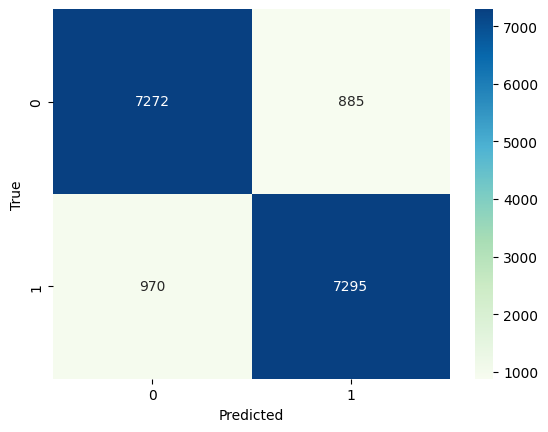

In [122]:
tabla=confusion_matrix(y_test, ensemble_predictions)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [10]:
ensemble_model = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model), ('svm', svm_classifier)], voting='hard')  
ensemble_model.fit(ds_trabajo_x, ds_trabajo_y)
ensemble_predictions = ensemble_model.predict(data_test.drop('id', axis = 1))

resultado = pd.DataFrame()
resultado['id'] = data_test['id']
resultado['is_canceled'] = ensemble_predictions
#Comento esta linea para que no crear el archivo siempre
resultado.to_csv('predicciones.csv', index=False)

## Ensamble tipo stacking

In [72]:
base_models = [
    ('random_forest', rf_model),
    ('xgb', xgb_model)
]

meta_model = LogisticRegressionCV(class_weight=None,
                                  penalty='l1',
                                  solver='liblinear',
                                  random_state=30 
                                  )

stacking_model = StackingClassifier(estimators=base_models, 
                                    final_estimator=meta_model, 
                                    passthrough=True, 
                                    cv=10,
                                    verbose=2)

In [27]:
#Evaluo en conjunto de test
stacking_model.fit(x_train,y_train)
st_predictions = stacking_model.predict(x_test)
ds_resultados=pd.DataFrame(zip(y_test, st_predictions),columns=['test','pred'])

#Observamos accuracy del modelo
accuracy = accuracy_score(y_test, st_predictions)
print("Accuracy:", accuracy)

#Observamos la precision del modelo
precision = precision_score(y_test, st_predictions)
print("Precisión:", precision)

#Observamos el recall del modelo
recall = recall_score(y_test, st_predictions)
print("Recall:", recall)

#Observamos el F1 Score de este arbol
f1 = f1_score(y_test, st_predictions)
print("F1-Score:", f1)

Accuracy: 0.886006576543661
Precisión: 0.8919681177191907
Recall: 0.880096793708409
F1-Score: 0.8859926918392206


Text(50.722222222222214, 0.5, 'True')

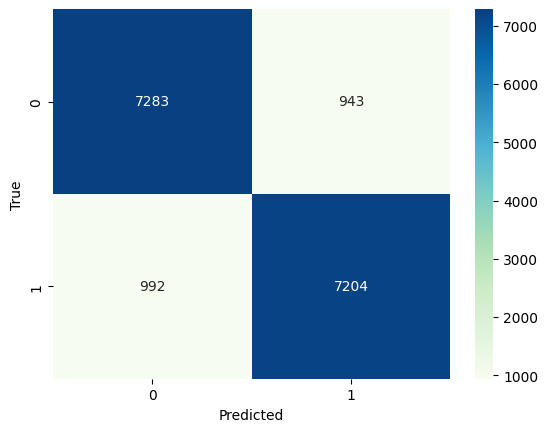

In [14]:
tabla=confusion_matrix(y_test, st_predictions)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [73]:
stacking_model.fit(ds_trabajo_x, ds_trabajo_y)
y_pred = stacking_model.predict(data_test.drop('id', axis = 1))

resultado = pd.DataFrame()
resultado['id'] = data_test['id']
resultado['is_canceled'] = y_pred
#Comento esta linea para que no crear el archivo siempre
resultado.to_csv('predicciones.csv', index=False)

# Redes neuronales

In [128]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')

In [58]:
cant_clases=1
d_in = x_train.shape[1]

modelo1 = Sequential([
    keras.layers.Dense(64, input_shape=(d_in,)),
    keras.layers.Dense(cant_clases, activation='sigmoid')])

modelo1.summary()

modelo1.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='binary_crossentropy',
  metrics=['accuracy']
)

cant_epochs=50

modelo_h1 = modelo1.fit(x_train,y_train,
                    epochs=cant_epochs,
                    batch_size=50,verbose='auto')

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 64)                3072      
                                                                 
 dense_56 (Dense)            (None, 1)                 65        
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
767/767 [==============================] - 1s 752us/step - loss: 8.4357 - accuracy: 0.6697
Epoch 2/50
767/767 [==============================] - 1s 817us/step - loss: 0.6468 - accuracy: 0.7378
Epoch 3/50
767/767 [==============================] - 1s 725us/step - loss: 0.7132 - accuracy: 0.7369
Epoch 4/50
767/767 [==============================] - 1s 712us/step - loss: 0.7182 - accuracy: 0.7411
Epoch 5/50
767/767 [==============================] - 1s 733us/step - loss: 0.6306 - accuracy: 0.7524
Epoch 6/50
767/767 [==============================] - 1s 724us/step - loss: 0.6909 - accuracy: 0.7415
Epoch 7/50
767/767 [==============================] - 1s 704us/step - loss: 0.6915 - accuracy: 0.7452
Epoch 8/50
767/767 [==============================] - 1s 751us/step - loss: 0.7339 - accuracy: 0.7439
Epoch 9/50
767/767 [==============================] - 1s 834us/step - loss: 0.6953 - accuracy: 0.7489
Epoch 10/50
767/767 [==============================] - 1s 751us/step - loss: 0.680

514/514 [==============================] - 0s 538us/step


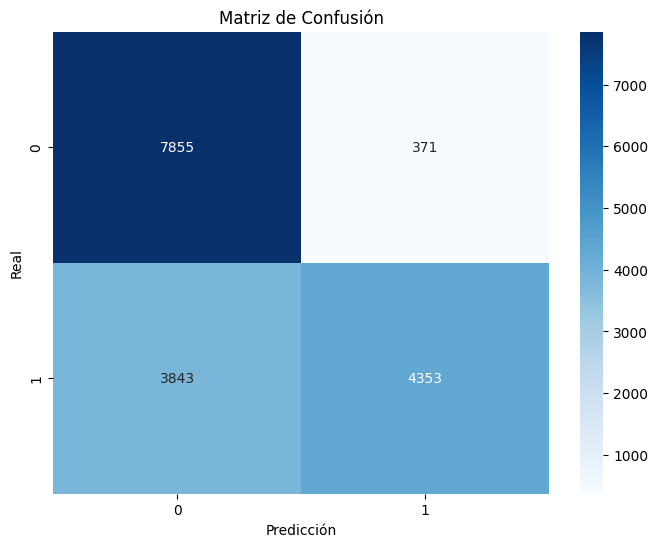

In [59]:
predicciones = modelo1.predict(x_test)
umbral = 0.5
predicciones_binarias = (predicciones > umbral).astype(int)

cm = confusion_matrix(y_test, predicciones_binarias)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [60]:
predicciones = modelo1.predict(x_test)

umbral = 0.5
predicciones_binarias = [1 if p > umbral else 0 for p in predicciones]

accuracy = accuracy_score(y_test, predicciones_binarias)
precision = precision_score(y_test, predicciones_binarias)
recall = recall_score(y_test, predicciones_binarias)
f1 = f1_score(y_test, predicciones_binarias)

print("Accuracy:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

514/514 [==============================] - 0s 525us/step
Accuracy: 0.7433930093776641
Precisión: 0.9214648602878917
Recall: 0.531112737920937
F1-Score: 0.6738390092879257


Submit a kaggle

In [123]:
d_in = ds_trabajo_x.shape[1]
ds_trabajo_x = ds_trabajo_x.astype('float32')
ds_trabajo_y = ds_trabajo_y.astype('float32')

modelo1 = Sequential([
    keras.layers.Dense(64, input_shape=(d_in,)),
    keras.layers.Dense(cant_clases, activation='sigmoid')])

modelo1.summary()

modelo1.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='binary_crossentropy',
  metrics=['accuracy']
)

cant_epochs=50

modelo1.fit(ds_trabajo_x,ds_trabajo_y,
                    epochs=cant_epochs,
                    batch_size=50,verbose=False)

dt_pred = data_test.drop(['id'], axis=1)
dt_pred = dt_pred.astype('float32')

y_pred = modelo1.predict(dt_pred)

umbral = 0.5
predicciones_binarias = [1 if p > umbral else 0 for p in y_pred]

resultado = pd.DataFrame()
resultado['id'] = data_test['id']
resultado['is_canceled'] = predicciones_binarias
#Comento esta linea para que no crear el archivo siempre
resultado.to_csv('predicciones.csv', index=False)

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 64)                3072      
                                                                 
 dense_125 (Dense)           (None, 1)                 65        
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


830/830 [==============================] - 0s 497us/step


Buscamos mejorar hiperparametros a mano

Normalizamos los datos

In [130]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [62]:
modelo2 = Sequential([
    keras.layers.Dense(32, input_shape=(d_in,),activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.01),
    keras.layers.Dense(cant_clases, activation='sigmoid')])

modelo2.summary()

modelo2.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='binary_crossentropy',
  metrics=['accuracy']
)

cant_epochs=120

modelo_h = modelo2.fit(X_train_scaled,y_train,
                    epochs=cant_epochs,
                    batch_size=50,verbose='auto')

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 32)                1536      
                                                                 
 dense_58 (Dense)            (None, 16)                528       
                                                                 
 dropout_13 (Dropout)        (None, 16)                0         
                                                                 
 dense_59 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2081 (8.13 KB)
Trainable params: 2081 (8.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/120
767/767 [==============================] - 1s 905us/step - loss: 0.5481 - accuracy: 0.7877
Epoch 2/120
767/767 [==============================] - 1s 828us/step - loss: 0.3971 - accuracy: 0.8221
Epoch 3/120
767/767 [==============================] - 1s 877us/step - loss: 0.3804 - accuracy: 0.8252
Epoch 4/120
767/767 [==============================] - 1s 892us/step - loss: 0.3714 - accuracy: 0.8300
Epoch 5/120
767/767 [==============================] - 1s 833us/step - loss: 0.3663 - accuracy: 0.8333
Epoch 6/120
767/767 [==============================] - 1s 799us/step - loss: 0.3608 - accuracy: 0.8360
Epoch 7/120
767/767 [==============================] - 1s 864us/step - loss: 0.3591 - accuracy: 0.8354
Epoch 8/120
767/767 [==============================] - 1s 831us/step - loss: 0.3565 - accuracy: 0.8373
Epoch 9/120
767/767 [==============================] - 1s 921us/step - loss: 0.3539 - accuracy: 0.8399
Epoch 10/120
767/767 [==============================] - 1s 872us/step - l

In [64]:
predicciones = modelo2.predict(X_test_scaled)

umbral = 0.5
predicciones_binarias = [1 if p > umbral else 0 for p in predicciones]

accuracy = accuracy_score(y_test, predicciones_binarias)
precision = precision_score(y_test, predicciones_binarias)
recall = recall_score(y_test, predicciones_binarias)
f1 = f1_score(y_test, predicciones_binarias)

print("Accuracy:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

  1/514 [..............................] - ETA: 7s

514/514 [==============================] - 0s 548us/step
Accuracy: 0.8508707830958471
Precisión: 0.8626782784298876
Recall: 0.8339433870180576
F1-Score: 0.848067497983746


Submit a kaggle

In [112]:
d_in = ds_trabajo_x.shape[1]
ds_trabajo_x = ds_trabajo_x.astype('float32')
ds_trabajo_y = ds_trabajo_y.astype('float32')

modelo2 = Sequential([
    keras.layers.Dense(32, input_shape=(d_in,),activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.01),
    keras.layers.Dense(cant_clases, activation='sigmoid')])

modelo2.summary()

modelo2.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='binary_crossentropy',
  metrics=['accuracy']
)

cant_epochs=120

modelo2.fit(ds_trabajo_x,ds_trabajo_y,
                    epochs=cant_epochs,
                    batch_size=50,verbose=False)

dt_pred = data_test.drop(['id'], axis=1)
dt_pred = dt_pred.astype('float32')

y_pred = modelo2.predict(dt_pred)

umbral = 0.5
predicciones_binarias = [1 if p > umbral else 0 for p in y_pred]

resultado = pd.DataFrame()
resultado['id'] = data_test['id']
resultado['is_canceled'] = predicciones_binarias
#Comento esta linea para que no crear el archivo siempre
resultado.to_csv('predicciones.csv', index=False)

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_121 (Dense)           (None, 32)                1536      
                                                                 
 dense_122 (Dense)           (None, 16)                528       
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 dense_123 (Dense)           (None, 1)                 17        
                                                                 
Total params: 2081 (8.13 KB)
Trainable params: 2081 (8.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


830/830 [==============================] - 0s 529us/step


Buscamos hiperparametros con GridSearchCV

In [ ]:
def create_model(optimizer='adam', neurons=32):
    model = keras.Sequential([
        keras.layers.Dense(neurons, activation='relu', input_shape=(d_in,)),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = keras.KerasClassifier(build_fn=create_model, epochs=10, batch_size=50, verbose=0)
param_grid = {'optimizer': ['adam', 'sgd'], 'neurons': [16,32, 64]}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_scaled, y_train)

In [131]:
modelo3 = Sequential([
    keras.layers.Dense(32, input_shape=(d_in,),activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(cant_clases, activation='sigmoid')])

modelo3.summary()

modelo3.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='binary_crossentropy',
  metrics=['accuracy']
)

cant_epochs=150

modelo_h3 = modelo3.fit(X_train_scaled,y_train,
                    epochs=cant_epochs,
                    batch_size=50,verbose='auto')

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 32)                1536      
                                                                 
 dense_133 (Dense)           (None, 16)                528       
                                                                 
 dense_134 (Dense)           (None, 1)                 17        
                                                                 
Total params: 2081 (8.13 KB)
Trainable params: 2081 (8.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/150
767/767 [==============================] - 1s 781us/step - loss: 0.4535 - accuracy: 0.7882
Epoch 2/150
767/767 [==============================] - 1s 749us/step - loss: 0.3861 - accuracy: 0.8238
Epoch 3/150
767/767 [==============================] - 1s 798us/step - loss: 0.3698 - accuracy: 0.8307
Epoch 4/150
767/767 [==============================] - 1s 725us/step - loss: 0.3600 - accuracy: 0.8327
Epoch 5/150
767/767 [==============================] - 1s 753us/step - loss: 0.3521 - accuracy: 0.8382
Epoch 6/150
767/767 [==============================] - 1s 809us/step - loss: 0.3463 - accuracy: 0.8408
Epoch 7/150
767/767 [==============================] - 1s 760us/step - loss: 0.3416 - accuracy: 0.8428
Epoch 8/150
767/767 [==============================] - 1s 786us/step - loss: 0.3383 - accuracy: 0.8464
Epoch 9/150
767/767 [==============================] - 1s 781us/step - loss: 0.3351 - accuracy: 0.8472
Epoch 10/150
767/767 [==============================] - 1s 745us/step - l

  1/514 [..............................] - ETA: 17s

514/514 [==============================] - 0s 533us/step


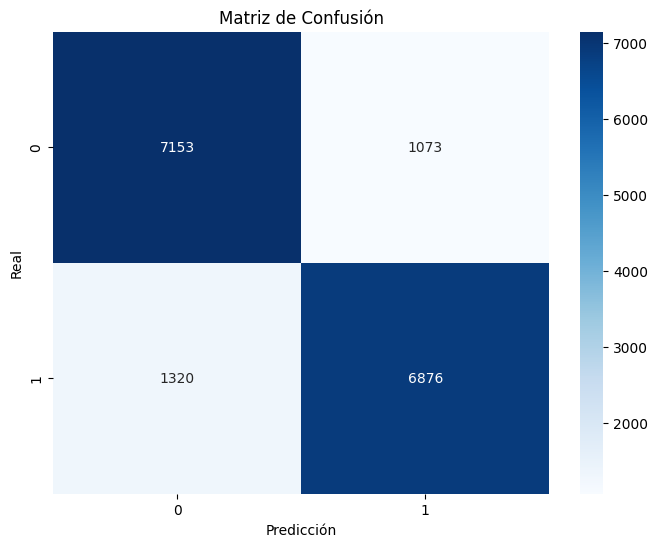

In [66]:
predicciones = modelo3.predict(X_test_scaled)
umbral = 0.5
predicciones_binarias = (predicciones > umbral).astype(int)

cm = confusion_matrix(y_test, predicciones_binarias)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

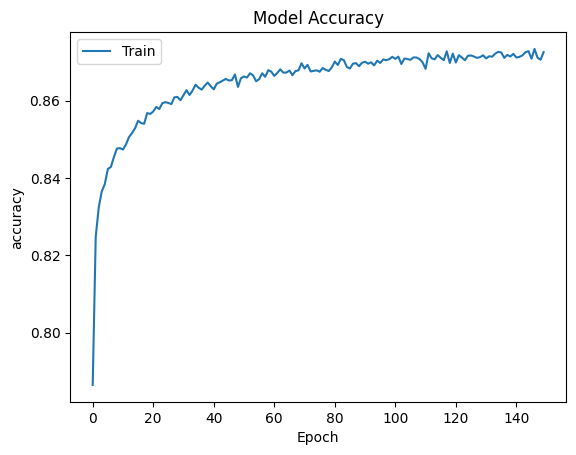

In [67]:
plt.plot(modelo_h3.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [68]:
test_loss, test_accuracy = modelo3.evaluate(X_test_scaled, y_test)
print(f'Pérdida en prueba: {test_loss}')
print(f'Precisión en prueba: {test_accuracy}')

514/514 [==============================] - 0s 634us/step - loss: 0.3385 - accuracy: 0.8543
Pérdida en prueba: 0.338545560836792
Precisión en prueba: 0.8542808294296265


In [69]:
predicciones = modelo3.predict(X_test_scaled)

umbral = 0.5
predicciones_binarias = [1 if p > umbral else 0 for p in predicciones]

accuracy = accuracy_score(y_test, predicciones_binarias)
precision = precision_score(y_test, predicciones_binarias)
recall = recall_score(y_test, predicciones_binarias)
f1 = f1_score(y_test, predicciones_binarias)

print("Accuracy:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

  1/514 [..............................] - ETA: 8s

514/514 [==============================] - 0s 529us/step
Accuracy: 0.8542808427718913
Precisión: 0.8650144672285822
Recall: 0.8389458272327965
F1-Score: 0.8517807370703003


In [109]:
d_in = ds_trabajo_x.shape[1]
ds_trabajo_x = ds_trabajo_x.astype('float32')
ds_trabajo_y = ds_trabajo_y.astype('float32')

modelo3 = Sequential([
    keras.layers.Dense(32, input_shape=(d_in,),activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(cant_clases, activation='sigmoid')])

modelo3.summary()

modelo3.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss='binary_crossentropy',
  metrics=['accuracy']
)

cant_epochs=150

modelo3.fit(ds_trabajo_x,ds_trabajo_y,
                    epochs=cant_epochs,
                    batch_size=50,verbose=False)

dt_pred = data_test.drop(['id'], axis=1)
dt_pred = dt_pred.astype('float32')

y_pred = modelo3.predict(dt_pred)

umbral = 0.5
predicciones_binarias = [1 if p > umbral else 0 for p in y_pred]

resultado = pd.DataFrame()
resultado['id'] = data_test['id']
resultado['is_canceled'] = predicciones_binarias
#Comento esta linea para que no crear el archivo siempre
resultado.to_csv('predicciones.csv', index=False)

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_118 (Dense)           (None, 32)                1536      
                                                                 
 dense_119 (Dense)           (None, 16)                528       
                                                                 
 dense_120 (Dense)           (None, 1)                 17        
                                                                 
Total params: 2081 (8.13 KB)
Trainable params: 2081 (8.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
830/830 [==============================] - 0s 547us/step
